In [19]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from astropy.convolution import Gaussian2DKernel
from scipy.signal import convolve2d

In [17]:
def convolution_2d(img, f, stride=[1,1]):
    x,y = img.shape
    f = np.flip(f)
    m,n = f.shape
    
    s_x, s_y = stride
    k_x, k_y = m//2, n//2
    pad_x, pad_y = k_x + s_x - 1, k_y + s_y  - 1
    
    img = np.pad(img, [pad_x,pad_y], 'constant')
    
    conv_img = np.empty((x//s_x, y//s_y))
    
    for i,p in zip(range(pad_x, x + pad_x, s_x), range(conv_img.shape[0])):
        for j,q in zip(range(pad_y, y + pad_y, s_y), range(conv_img.shape[1])):
            w = img[i - k_x:i + k_x + 1, j - k_y:j + k_y + 1]
            conv_img[p,q] = np.dot(w.flatten(), f.flatten())

    return conv_img

In [61]:
def laplacian_pyramid(img, l=3):
    
    h = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
    
    downsampled = [img]
    
    upsampled = []
    diff = []
    
    recon = []
    for i in range(l):
        
        im = downsampled[i]
        
        m,n = im.shape
        
        conv = convolution_2d(im, h, [2,2])    
        
        downsampled.append(conv)
        
        conv_up = cv2.pyrUp(conv, cv2.BORDER_DEFAULT)
        
#         print(conv_up.shape)

        print(im.shape, conv_up.shape)
        
        d = im - conv_up
        
        diff.append(d)
        
        
        
        recon.append(conv_up + d)
        
    return recon

shape: (1200, 754)


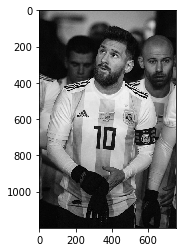

In [5]:
img = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)
print('shape: {}'.format(img.shape))

plt.imshow(img, cmap='gray')
plt.show()

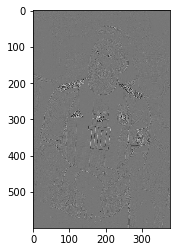

In [26]:
h = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

plt.imshow(convolution_2d(img, h, [2,2]), cmap='gray')

In [62]:
recon = laplacian_pyramid(img)

(1200, 754) (1200, 754)
(600, 377) (600, 376)


ValueError: operands could not be broadcast together with shapes (600,377) (600,376) 